In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [57]:
from sklearn.datasets import make_blobs

In [58]:
np.random.seed(101)

In [59]:
num_features = 3
num_clusters = 4
num_points = 150

In [60]:
x,y = make_blobs(n_samples=num_points, n_features=num_features, centers=num_clusters)

In [61]:
x.shape

(150, 3)

In [62]:
y.shape

(150,)

In [63]:
# plt.scatter(x[:,0],x[:,1],c=y)

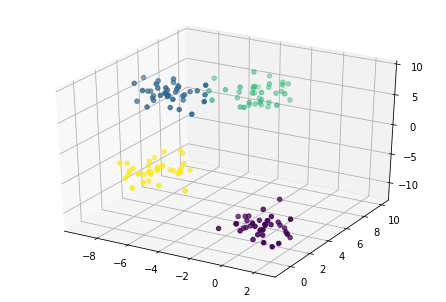

In [64]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y)

In [65]:
points = np.hstack((x,np.zeros((len(x),1))))

In [66]:
points.shape

(150, 4)

In [67]:
# clusters = np.random.uniform(x.min(), x.max(), size=(num_clusters,num_features))

In [68]:
clusters_colors = ['b', 'g', 'r', 'c', 'm', 'y' ,'k']
clusters_colors = clusters_colors[:num_clusters]

In [14]:
# plt.scatter(points[:,0],points[:,1], c = y)
# plt.scatter(clusters[:,0], clusters[:,1], c = clusters_colors, marker = '^', linewidths = 10)

In [69]:
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=y)
# ax.scatter(clusters[:, 0], clusters[:, 1], clusters[:, 2], c=clusters_colors, marker = '^', linewidths = 10)

In [70]:
#distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x1, x2)]))
#distance = np.linalg.norm(x1-x2)

In [71]:
def count_distance(clusters, points):
    distances = np.empty((num_clusters,1))

    for i in range(num_points):
        for n in range(num_clusters):
            distances[n] = np.linalg.norm(clusters[n]-points[i,:-1])
        near_cluster = np.argmin(distances)
        points[i,-1] = near_cluster
    return points

In [72]:
def color_points(points):
    points_colors = []
    for i in range(num_points):
        points_colors.append(clusters_colors[int(points[i,-1])])
    return points_colors

In [73]:
# points = count_distance(clusters, points)
# points_colors = color_points(points)

In [74]:
# plt.scatter(points[:,0],points[:,1],c=points_colors)
# plt.scatter(clusters[:,0], clusters[:,1], c = clusters_colors, marker = '^', linewidths = 10)

In [75]:
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points_colors)
# ax.scatter(clusters[:, 0], clusters[:, 1], clusters[:, 2], c=clusters_colors, marker = '^', linewidths = 10)

In [76]:
def move_centroid(points, clusters_pos):
    for n in range(num_clusters):
        selected_points = [point[:-1] for point in points if n == point[-1]]
        if selected_points:
            clusters_pos[n] = np.mean(selected_points, axis=0)
    return clusters_pos

In [77]:
# clusters = move_centroid(points)

In [78]:
# plt.scatter(points[:,0],points[:,1],c=points_colors)
# plt.scatter(clusters[:,0], clusters[:,1], c = clusters_colors, marker = '^', linewidths = 10)

In [79]:
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points_colors)
# ax.scatter(clusters[:, 0], clusters[:, 1], clusters[:, 2], c=clusters_colors, marker = '^', linewidths = 10)

In [80]:
# points = count_distance(clusters, points)
# points_colors = color_points(points)

In [81]:
# plt.scatter(points[:,0],points[:,1],c=points_colors)
# plt.scatter(clusters[:,0], clusters[:,1], c = clusters_colors, marker = '^', linewidths = 10)

In [82]:
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points_colors)
# ax.scatter(clusters[:, 0], clusters[:, 1], clusters[:, 2], c=clusters_colors, marker = '^', linewidths = 10)

In [83]:
# for epoch in range(1000):
#     points = count_distance(clusters, points)
#     points_colors = color_points(points)
#     clusters = move_centroid(points)

In [84]:
# plt.scatter(points[:,0],points[:,1],c=points_colors)
# plt.scatter(clusters[:,0], clusters[:,1], c = clusters_colors, marker = '^', linewidths = 10)

In [85]:
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points_colors)
# ax.scatter(clusters[:, 0], clusters[:, 1], clusters[:, 2], c=clusters_colors, marker = '^', linewidths = 10)

In [86]:
def count_error(clusters, points):
    errors = np.empty((num_clusters))
    for n in range(num_clusters):
        distances = [np.linalg.norm(clusters[n]-point[:-1]) for point in points if n == point[-1]]
        errors[n] = np.sum(distances)
    return np.sum(errors)

In [87]:
np.random.seed(101)

min_error = 1000000

for i in range(10):
    clusters = np.random.uniform(x.min(), x.max(), size=(num_clusters,num_features))
    init_clusters = clusters.copy()
    for epoch in range(100):
        points = count_distance(clusters, points)
        points_colors = color_points(points)
        clusters = move_centroid(points, clusters)
    error = count_error(clusters, points)
    if error < min_error:
        min_error = error
        save_clusters = clusters
        save_init_clusters = init_clusters
    print(error)

246.86651461705847
353.78066213136395
351.2085775532227
358.8453018706917
349.6214869805239
246.86651461705847
592.1479107304003
592.1479107304003
592.1479107304003
592.1479107304003


In [89]:
points = count_distance(save_clusters, points)
points_colors = color_points(points)

In [90]:
# plt.title('Error: ' + str(min_error))
# plt.scatter(points[:,0],points[:,1],c=points_colors)
# plt.scatter(save_clusters[:,0], save_clusters[:,1], c = clusters_colors, marker = '^', linewidths = 10)
# plt.scatter(save_init_clusters[:,0], save_init_clusters[:,1], c = clusters_colors, marker = 'o', linewidths = 10)

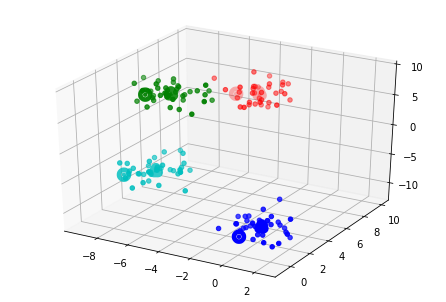

In [92]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points_colors)
ax.scatter(save_clusters[:, 0], save_clusters[:, 1], save_clusters[:, 2], c=clusters_colors, marker = '^', linewidths = 10)
ax.scatter(save_init_clusters[:, 0], save_init_clusters[:, 1], save_init_clusters[:, 2], c=clusters_colors, marker = 'o', linewidths = 10)

# SKLEARN

In [45]:
from sklearn.cluster import KMeans

In [46]:
km = KMeans(n_clusters=4)

In [47]:
km.fit(points[:,:-1])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
km.cluster_centers_

array([[ 3.72721215,  6.53776213],
       [-9.48126422, -6.51991349],
       [-3.93500883,  8.08606481],
       [ 0.20374114,  1.85167429]])

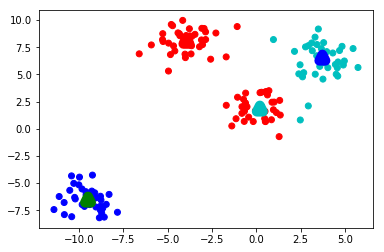

In [50]:
plt.scatter(points[:,0],points[:,1],c=points_colors)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = clusters_colors, marker = '^', linewidths = 10)

In [43]:
points.shape

(150, 3)